In [1]:
import pandas as pd
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')

from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import numpy as np
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

os.chdir(r"D:\wine_review\output")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VineetSajwan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_csv(r"D:\wine_review_data\winemag-data_first150k.csv", index_col = False)

In [3]:
# set seaborn style
sns.set(style="whitegrid")
stopwords = set(stopwords.words('english'))
# Detokenizer combines tokenized elements
detokenizer = TreebankWordDetokenizer()

In [4]:

def clean_description(desc):
    desc = word_tokenize(desc.lower())
    desc = [token for token in desc if token not in stopwords and token.isalpha()]
    return detokenizer.detokenize(desc)

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer=WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

def wine_quality(column):
    if column < 84:
        quality = "Under Average wines"
    if column >= 84 and column < 88:
        quality = "Average wines"
    if column >= 88 and column < 92:
        quality = "Good wines"
    if column >= 92 and column < 96:
        quality = "Very Good wines"
    if column >= 96:
        quality = "Excellent wines"
    return quality


In [5]:
data["cleaned_description"] = data["description"].apply(clean_description)

In [6]:
#data['cleaned_description'] = data.cleaned_description.apply(lemmatize_text)

In [7]:
data.rename(columns={"Unnamed: 0":"id"},inplace=True)
data["quality"]=data["points"].apply(wine_quality)

In [8]:
#data['cleaned_description'] = [" ".join(i) for i in data['cleaned_description']]

In [9]:
data.head()

,id,country,description,designation,points,price,province,region_1,region_2,variety,winery,cleaned_description,quality
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,tremendous varietal wine hails oakville aged t...,Excellent wines
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe aromas fig blackberry cassis softened swe...,Excellent wines
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,mac watson honors memory wine made mother trem...,Excellent wines
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,spent months new french oak incorporates fruit...,Excellent wines
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,top wine la bégude named highest point vineyar...,Very Good wines


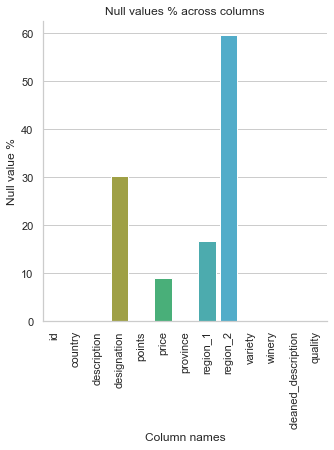

In [10]:
_1 = pd.DataFrame(round((data.isna().sum()/data.shape[0])*100,2)).reset_index().rename(columns={"index":"Column names",0:"Null value %"})
ax=sns.catplot(data=_1, x="Column names", y="Null value %", kind="bar")
ax.set_xticklabels(rotation=90 )
plt.title("Null values % across columns")
plt.show()

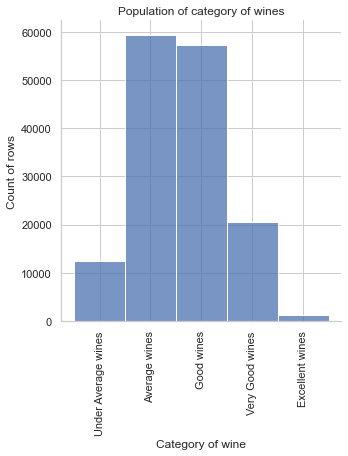

In [11]:

# set categorical order
data['quality'] = pd.Categorical(data['quality'],
                                   categories=['Under Average wines', 'Average wines', 'Good wines', 'Very Good wines','Excellent wines'],
                                   ordered=True)
ax = sns.displot(data, x="quality")
ax.set_xticklabels(rotation=90 )
ax.set(xlabel='Category of wine', ylabel='Count of rows')
plt.title("Population of category of wines")

plt.show()

C:\Users\VineetSajwan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


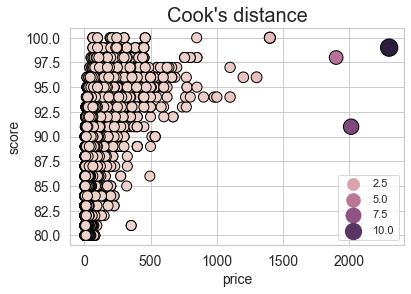

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence

# fit the regression model using statsmodels library 
f = 'points ~ price'
model = ols(formula=f, data=data).fit()

# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance

# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
sns.scatterplot(data.price, data.points, hue=distance, size=distance, sizes=(100, 300), edgecolor='black', linewidth=1)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('price', fontsize=14)
plt.ylabel('score', fontsize=14)
#plt.xlim(0,20)
plt.title('Cook\'s distance', fontsize=20);

In [13]:
import math
data["price_log"] = data[["price"]].applymap(math.log10)

C:\Users\VineetSajwan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


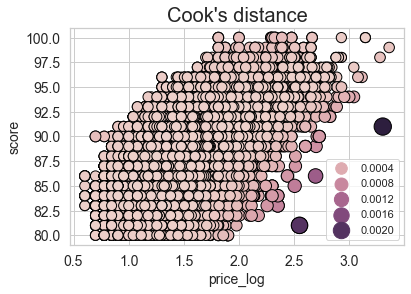

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence

# fit the regression model using statsmodels library 
f = 'points ~ price_log'
model = ols(formula=f, data=data).fit()

# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance

# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
sns.scatterplot(data.price_log, data.points, hue=distance, size=distance, sizes=(100, 300), edgecolor='black', linewidth=1)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('price_log', fontsize=14)
plt.ylabel('score', fontsize=14)
#plt.xlim(0,20)
plt.title('Cook\'s distance', fontsize=20);

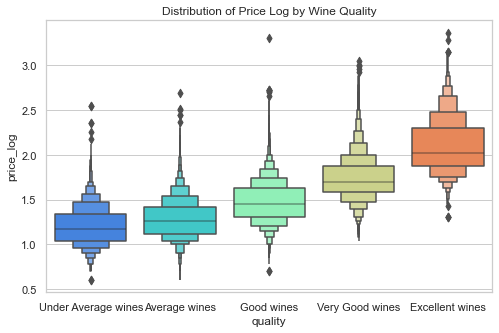

In [15]:

plt.figure(figsize=(8,5))
sns.boxenplot(x='quality', y='price_log', data=data, palette='rainbow')

plt.title("Distribution of Price Log by Wine Quality")
plt.show()

In [18]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=.6, min_df=.01)
X = vectorizer.fit_transform(data['cleaned_description'])
terms = vectorizer.get_feature_names()
#print(terms)
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=terms)
modelling_df = pd.concat([data[["id","cleaned_description","points","quality"]],df],axis=1)

C:\Users\VineetSajwan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
def ranking(corpus):
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,2), max_df = .6, min_df = .01)
    X = vectorizer.fit_transform(corpus)
    terms = vectorizer.get_feature_names()
    dense = X.todense()
    denselist = dense.tolist()
    df = pd.DataFrame(denselist, columns=terms)
    new_data = df.transpose()
    new_data.columns = ['average_reviews', 'good_reviews']

    return new_data

def top_features(data):
    avg_wines = data[data["quality"].isin(["Under Average wines","Average wines"])]
    good_wines = data[data["quality"].isin(["Good wines","Very Good wines","Excellent wines"])]
    average = " ".join(avg_wines['cleaned_description'])
    good = " ".join(good_wines['cleaned_description'])
    corpus =[average,good]
    corpus_ranking = ranking(corpus)
    avg_corpus_ranking = corpus_ranking[["average_reviews"]].reset_index().rename(columns={"index":"features","average_reviews":"weightage"})
    good_corpus_ranking = corpus_ranking[["good_reviews"]].reset_index().rename(columns={"index":"features","good_reviews":"weightage"})
    avg_top10_words = avg_corpus_ranking.sort_values("weightage",ascending=False).reset_index(drop=True).head(10)
    good_top10_words = good_corpus_ranking.sort_values("weightage",ascending=False).reset_index(drop=True).head(10)
    return avg_top10_words,good_top10_words

In [35]:
avg_top10_words,good_top10_words = top_features(data)

C:\Users\VineetSajwan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
avg_top10_words

,features,weightage
0,sweet simple,0.189448
1,gummy,0.083764
2,white sugar,0.079850
3,simple soft,0.075936
4,innocuous,0.064193
5,simple direct,0.061062
6,everyday chardonnay,0.061062
7,simple jammy,0.054799
8,unripe green,0.054016
9,dry simple,0.051668


In [37]:
good_top10_words

,features,weightage
0,crus,0.064995
1,ageworthy wine,0.062565
2,mouth long,0.057099
3,beautifully ripe,0.049809
4,brunello riserva,0.048594
5,long velvety,0.046772
6,impressive intensity,0.043735
7,beautiful cabernet,0.037661
8,powerful ripe,0.037053
9,excellent concentration,0.035838
